# Exercise: Polynomial Regression and Hyperparameters



Briefly explain polynomial regression + Compare hypotesis using regular linear regression with Polynomial regression to illustrate why we need the latter

What are hyperparemeters.

what we are doing in this Exercise

Mention metrics




## Preparing data
Explain the dataset we are using (should plot something similar to an exponential curve)



                             Account ID  Account Age  Total Accrued
0  106440e8-775d-4357-8485-d3923036b6c1           48          41239
1  b2c6c687-9c1a-4171-86d2-3ccf3759931d           12            920
2  db5f9ba8-0b3c-4fed-87fd-665bb273cbda           43          27851
3  73aa1fe8-dece-4aa5-a763-ddee06ef5aab           25           4304
4  213b5e44-60ce-447a-b7c3-12b465828af8           31          12805 



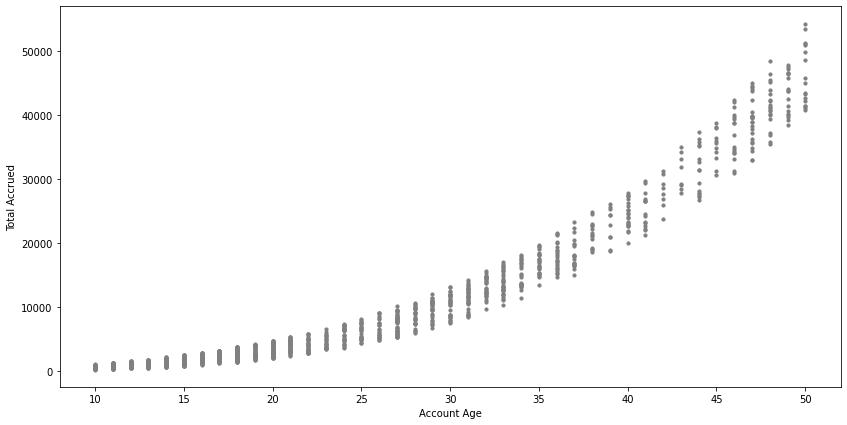

In [79]:
# Import everything we will need for this unit
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


# Load data from our dataset file into a pandas dataframe
dataset = pd.read_csv('Data/investments.csv', index_col=False, sep=",",header=0)

# Check what's in the dataset
print(dataset.head(), "\n")

# Plot dataset points
%matplotlib inline
X = dataset["Account Age"]
y = dataset["Total Accrued"]

f = plt.figure()
f.set_figwidth(14)
f.set_figheight(7)
plt.scatter(X, y, s=10, color="gray")
plt.ylabel('Total Accrued')
plt.xlabel("Account Age")
plt.show()

Explain the dataset above...why it's a curve and why the scatter?

## Polynomial Regression
- Show formula?
- Use Sklearn polynomial + linear to train/test



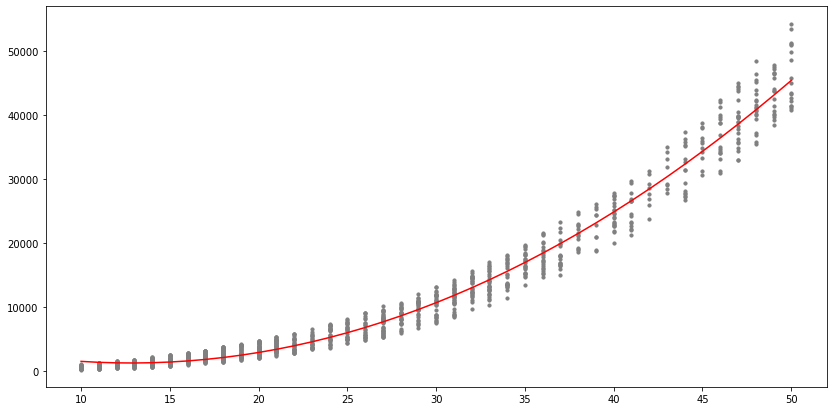

In [80]:
# X and y have to be two-domentional matrices
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

# Create a matrix of polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)
y_hat = model.predict(X_poly)

# Plot hypothesis over datapoints
f = plt.figure()
f.set_figwidth(14)
f.set_figheight(7)
plt.scatter(X, y, s=10, color="gray")
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_hat), key=sort_axis)
X, y_hat = zip(*sorted_zip)
plt.plot(X, y_hat, color="red")
plt.show()




Conclusion for the plot above

## Metrics
Use metrics such as RMSE/R2/Accuracy to evaluate the model

In [81]:
# metrics
rmse = np.sqrt(mean_squared_error(y,y_hat))
r2 = r2_score(y,y_hat)
print(rmse)
print(r2)

18092.197609734863
-1.2435126017065086


## Hyperparameters
- Briefly explain LR and num of iterations and tradeofs (when using gradient descent)
- Build a custom Class LinearRegressionWithGD that accepts hyperparams (explain why we have to) (sklearn does it automatically for us)
- Train model with a different number of iterations, ploting cost X iteration (use something too low, too high and something optimal)
- Gather metricts for best model, compare with the previous

- Animations showing the effects of learning rate on taining time go on next Unit

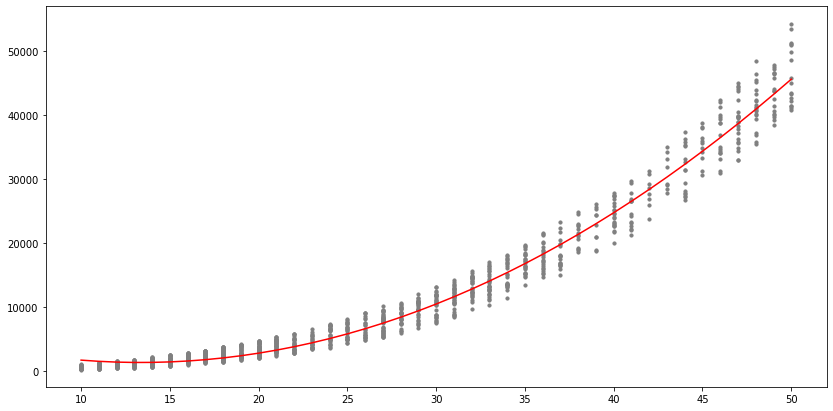

In [82]:


# Custom Linear Regression Implementation
# np.seterr(divide='ignore', invalid='ignore')
class PolynomialLinearRegression():
    """
    Custom Polynomial Linear Regression Implementation

    This allows us to set the learning rate and number of iterations in training
    and encapsulates feature normalization and feature matrix convertion to polynomial


    To return weights and cost history, use

    weights, J_history = model.gradientDescent(X, y, learning_rate, num_iters)
    """
    def to_polynomial(self, X):
        """Convert feature matrix into a 2 degree polynomial matrix"""
        poly = PolynomialFeatures(degree=2)
        X_poly = poly.fit_transform(X)
        return(X_poly)


    def normalize(self, X):
        """Normalize features using mean and std"""
        # You need to set these values correctly
        X_norm = X.copy()
        mu = np.zeros(X.shape[1])
        sigma = np.zeros(X.shape[1])    
        mu = np.mean(X, 0)
        sigma = np.std(X, 0)
        X_norm = (X_norm - mu) / sigma

        # not needed as this is done by to_polynomial
        # X_norm = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

        return X_norm, mu, sigma

    def cost(self, X, y, weights):
        """ Cost Function """
        m = y.shape[0] # number of training examples
        
        # You need to return the following variable correctly
        J = 0
        
        difference = np.dot(X, weights) - y
        J = np.dot(difference.T, difference) / (2 * m)
        
        return J


    def fit(self, X, y, learning_rate=0.01, num_iters=1000):
        # Initialize weights
        weights = np.zeros(X.shape[1])
        m = y.shape[0]
        
        # make a copy of weights, which will be updated by gradient descent
        weights = weights.copy()
        
        J_history = []
        
        for i in range(num_iters):
            h_vec = np.dot(X, weights)
            weights = weights - (learning_rate / m) * np.dot(h_vec - y, X)
            
            # save the cost J in every iteration
            J_history.append(self.cost(X, y, weights))
        
        return weights, J_history


    def predict(self, X, weights):
        return np.dot(X, weights)



# ------------------------------
X = dataset["Account Age"].values.reshape(-1,1)
y = dataset["Total Accrued"].values  #.reshape(-1,1)


model = PolynomialLinearRegression()
X_norm, mu, sigma = model.normalize(X)
X_poly = model.to_polynomial(X_norm)

weights, J_history = model.fit(X_poly, y, 0.01, 1000)


y_hat = model.predict(X_poly, weights)

# Plot hypothesis over datapoints
f = plt.figure()
f.set_figwidth(14)
f.set_figheight(7)
plt.scatter(X, y, s=10, color="gray")
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_hat), key=sort_axis)
X, y_hat = zip(*sorted_zip)
plt.plot(X, y_hat, color="red")
plt.show()


## Summary

- Recall what Polynomial Regression is and why we need it
- Recall what hyperparams are and how they influenced the model.
